# Data Exploration

In [586]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import polyval, polyfit
import seaborn as sns

from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.metrics import max_error
import math

In [2]:
df_pop = pd.read_csv("world_bank_pops.csv") # Source https://data.worldbank.org/indicator/SP.POP.TOTL
df_pop = pd.DataFrame(data=df_pop, columns=["Country Name", "2019 [YR2019]"])


In [3]:
# importing csv
df = pd.read_csv('country_vaccinations_kick_off.csv')

In [4]:
df = df.merge(df_pop, left_on='country', right_on='Country Name')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Country Name,2019 [YR2019]
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Albania,2854191
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Albania,2854191
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Albania,2854191
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Albania,2854191
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Albania,2854191


In [5]:
# number of rows by columns
df.shape # shape significatntly different from pre merge. Check lost data. Most likely countries with no mathcing names

(2730, 17)

In [6]:
# first 5 rows of dataset
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Country Name,2019 [YR2019]
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Albania,2854191
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Albania,2854191
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Albania,2854191
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Albania,2854191
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Albania,2854191


In [7]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Country Name,2019 [YR2019]
2725,United States,USA,2021-02-10,44769970.0,33783384.0,10469514.0,1563780.0,1555959.0,13.39,10.10,3.13,4652.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,United States,328239523
2726,United States,USA,2021-02-11,46390270.0,34723964.0,11188782.0,1620300.0,1598080.0,13.87,10.38,3.35,4778.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,United States,328239523
2727,United States,USA,2021-02-12,48410558.0,35834855.0,12085830.0,2020288.0,1655907.0,14.48,10.71,3.61,4951.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,United States,328239523
2728,United States,USA,2021-02-13,50641884.0,37056122.0,13082172.0,2231326.0,1657703.0,15.14,11.08,3.91,4957.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,United States,328239523
2729,United States,USA,2021-02-14,52884356.0,38292270.0,14077440.0,2242472.0,1667631.0,15.81,11.45,4.21,4986.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,United States,328239523


In [8]:
# number of na values in each field
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                      919
people_vaccinated                      1269
people_fully_vaccinated                1847
daily_vaccinations_raw                 1221
daily_vaccinations                      110
total_vaccinations_per_hundred          919
people_vaccinated_per_hundred          1269
people_fully_vaccinated_per_hundred    1847
daily_vaccinations_per_million          110
vaccines                                  0
source_name                               0
source_website                            0
Country Name                              0
2019 [YR2019]                             0
dtype: int64

In [9]:
# summary statistics
df.describe().round() # round function used to remove scientific notation in output

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1811.0,1461.0,883.0,1509.0,2620.0,1811.0,1461.0,883.0,2620.0
mean,1381045.0,1132239.0,385693.0,73745.0,58868.0,5.0,4.0,2.0,2084.0
std,4665196.0,3870553.0,1314371.0,215682.0,184981.0,11.0,8.0,4.0,3867.0
min,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,24974.0,22712.0,8366.0,1575.0,1129.0,0.0,0.0,0.0,320.0
50%,152069.0,130318.0,40453.0,9250.0,5696.0,2.0,2.0,1.0,888.0
75%,724527.0,610383.0,178798.0,57909.0,29910.0,4.0,3.0,1.0,1642.0
max,52884356.0,38292270.0,14077440.0,2242472.0,1916190.0,77.0,47.0,30.0,30869.0


# Visualizations of daily trends by selected countries

In [10]:
def time_plot(df,feature,country):
    '''
    Plot time graphs according to a feature for certain countries
    '''
    
    plt.figure(figsize=(20,12))

    for i,country in enumerate(country):
        plt.subplot(2,4,i+1)
        data = df[df['country'] == country]
        sns.lineplot(x=data['date'] ,y=data[feature],label = feature)
        plt.tick_params(axis='x',which='both',top=False,bottom=False,labelbottom=False)

    plt.show()

**Trends of total_vaccinations for countries with highest total number of vaccines**

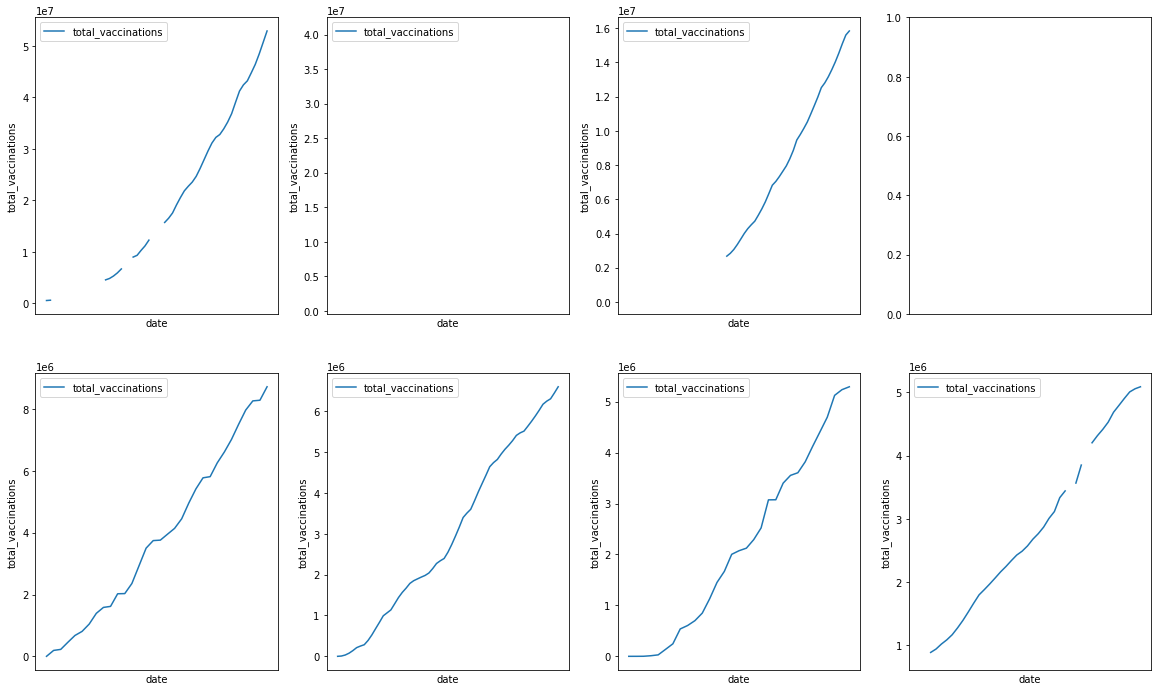

In [12]:
# # if desired, change the names of the list to the countries you want to plot
countries = ['United States','China','United Kingdom','England','India','Israel','Brazil','United Arab Emirates']

# plot of total_vaccinations for the countries above
time_plot(df,'total_vaccinations',countries)

**Trends of daily_vaccinations_raw for countries with highest total number of vaccines**

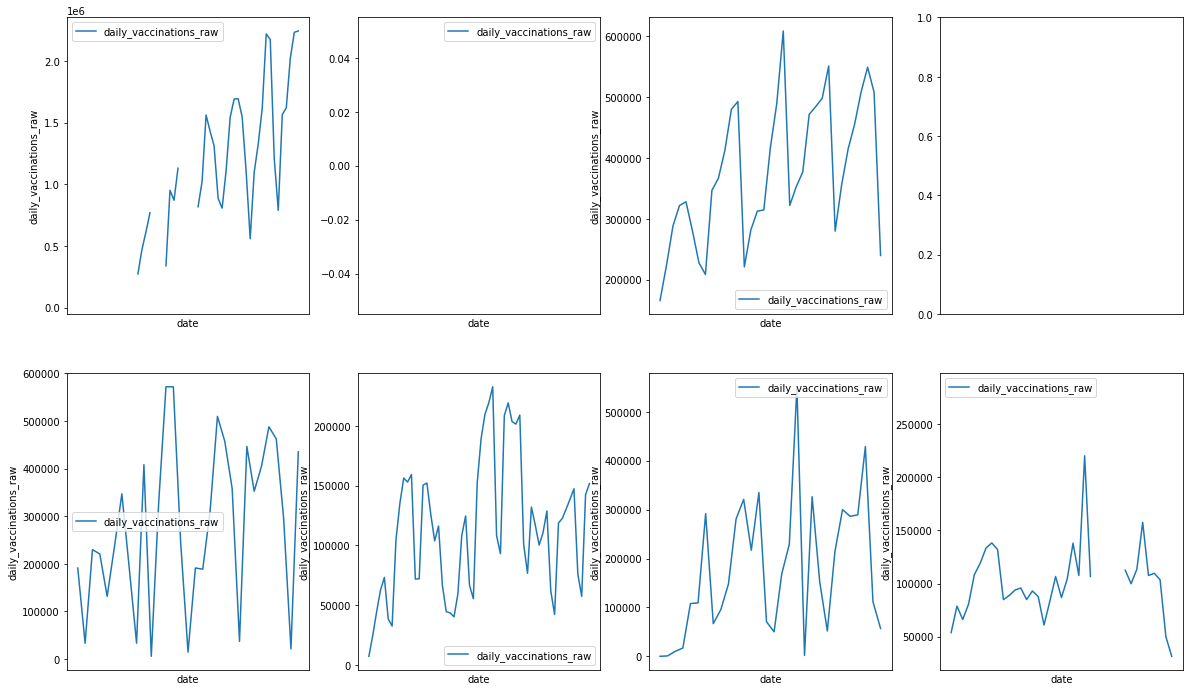

In [13]:
# if desired, change the names of the list to the countries you want to plot
countries = ['United States','China','United Kingdom','England','India','Israel','Brazil','United Arab Emirates']

# plot of daily_vaccinations_raw for the countries above
time_plot(df,'daily_vaccinations_raw',countries)

# Maximum values by country

Checking the maximum values of each field by country.

In [562]:
# group by country, then take maximum of each field, save to max_df
max_df = df.groupby(['country'])[['total_vaccinations','people_vaccinated','people_fully_vaccinated',
                        'daily_vaccinations_raw','daily_vaccinations','total_vaccinations_per_hundred',
                        'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
                        'daily_vaccinations_per_million','vaccines','2019 [YR2019]']].max().reset_index()

In [15]:
# 90 countries in dataset (noted from having 90 rows in max_df)
max_df

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Albania,1127.0,689.0,438.0,78.0,82.0,0.04,0.02,0.02,28.0,Pfizer/BioNTech
1,Algeria,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V
2,Andorra,1291.0,1291.0,NaN,NaN,66.0,1.67,1.67,NaN,854.0,Pfizer/BioNTech
3,Argentina,609791.0,372181.0,237610.0,47456.0,19820.0,1.35,0.82,0.53,439.0,Sputnik V
4,Austria,374034.0,242625.0,143889.0,29965.0,15156.0,4.15,2.69,1.60,1683.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...
70,Turkey,4182027.0,3608148.0,573879.0,558229.0,308326.0,4.96,4.28,0.68,3656.0,Sinovac
71,Turks and Caicos Islands,6433.0,6433.0,NaN,NaN,222.0,16.62,16.62,NaN,5734.0,Pfizer/BioNTech
72,United Arab Emirates,5086835.0,836568.0,250000.0,284857.0,160020.0,51.43,8.46,2.53,16179.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
73,United Kingdom,15839781.0,15300151.0,539630.0,609010.0,445204.0,23.33,22.54,0.79,6558.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


### Total vaccinations by country

In [16]:
# top 25 countries with most amount of vaccinations
max_df.groupby('country')['total_vaccinations'].sum().sort_values(ascending=False)[0:25]

country
United States           52884356.0
China                   40520000.0
United Kingdom          15839781.0
India                    8720822.0
Israel                   6599799.0
Brazil                   5293979.0
United Arab Emirates     5086835.0
Turkey                   4182027.0
Germany                  4146348.0
Italy                    3044535.0
France                   2896472.0
Spain                    2561608.0
Chile                    2147272.0
Poland                   2122245.0
Morocco                  1707091.0
Indonesia                1578720.0
Canada                   1258360.0
Romania                  1151112.0
Bangladesh               1132711.0
Serbia                    950871.0
Mexico                    749682.0
Argentina                 609791.0
Netherlands               606861.0
Belgium                   556882.0
Greece                    554745.0
Name: total_vaccinations, dtype: float64

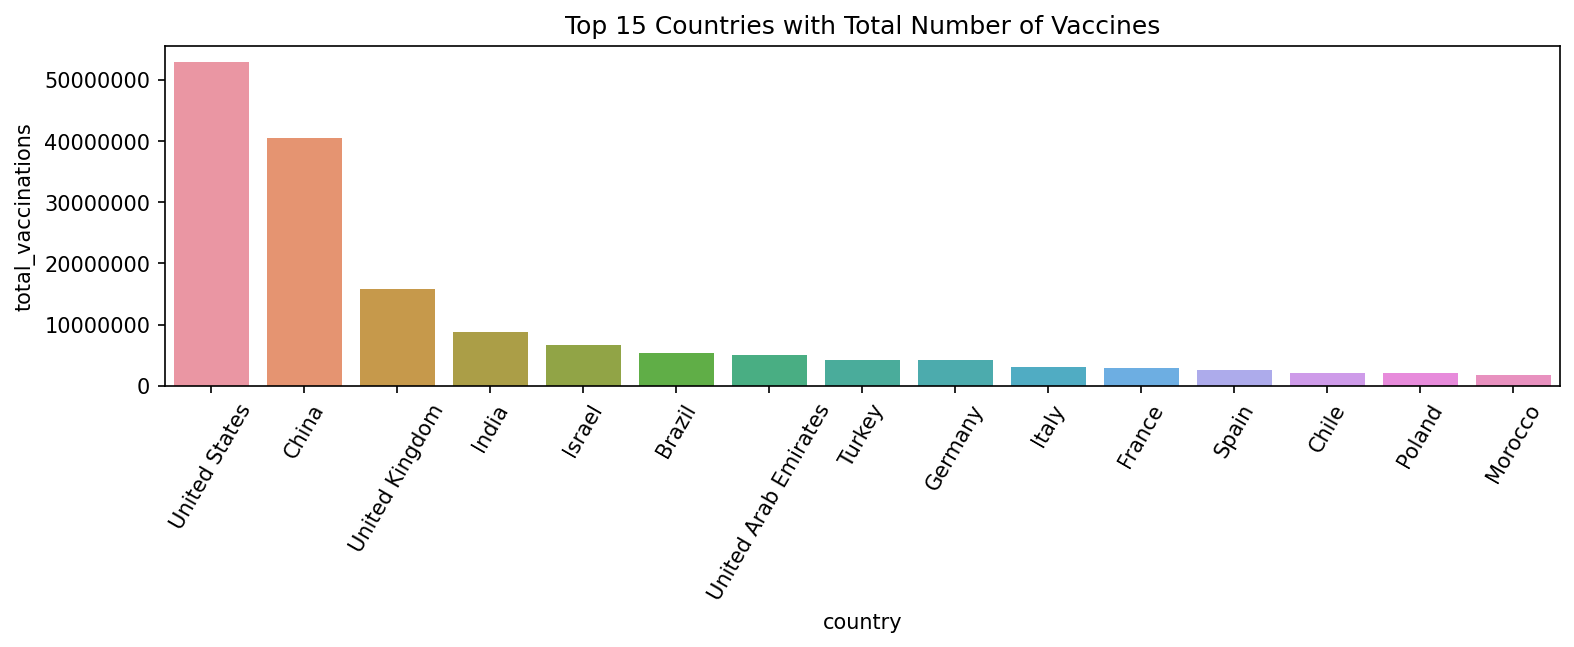

In [17]:
# plotting the total amount of vaccines given to countries
plt.figure(figsize=(12,3),dpi=150)
plt.title("Top 15 Countries with Total Number of Vaccines")
plt.xticks(rotation=60) # rotate x labels
plt.ticklabel_format(style='plain',axis='y')

# sort countries by total_vaccinations in descending order
plot_order = max_df.groupby('country')['total_vaccinations'].sum().sort_values(ascending=False).index.values

# plotting barplot of top 15 countries 
sns.barplot(data=max_df, x='country', y='total_vaccinations', order=plot_order[0:15]);

### Total number of people vaccinated by country

In [18]:
# top 25 countries with most amount of people vaccinated
max_df.groupby('country')['people_vaccinated'].sum().sort_values(ascending=False)[0:25]

country
United States           38292270.0
United Kingdom          15300151.0
Brazil                   5076110.0
Israel                   3988763.0
Turkey                   3608148.0
Germany                  2736109.0
France                   2255597.0
Chile                    2092453.0
Italy                    1756512.0
Spain                    1491517.0
Poland                   1476274.0
Bangladesh               1132711.0
Indonesia                1096095.0
Canada                    922234.0
United Arab Emirates      836568.0
Serbia                    783161.0
Romania                   696943.0
Mexico                    663484.0
Greece                    386049.0
Argentina                 372181.0
Belgium                   366558.0
Sweden                    341656.0
Hungary                   336297.0
Portugal                  331321.0
Bahrain                   250946.0
Name: people_vaccinated, dtype: float64

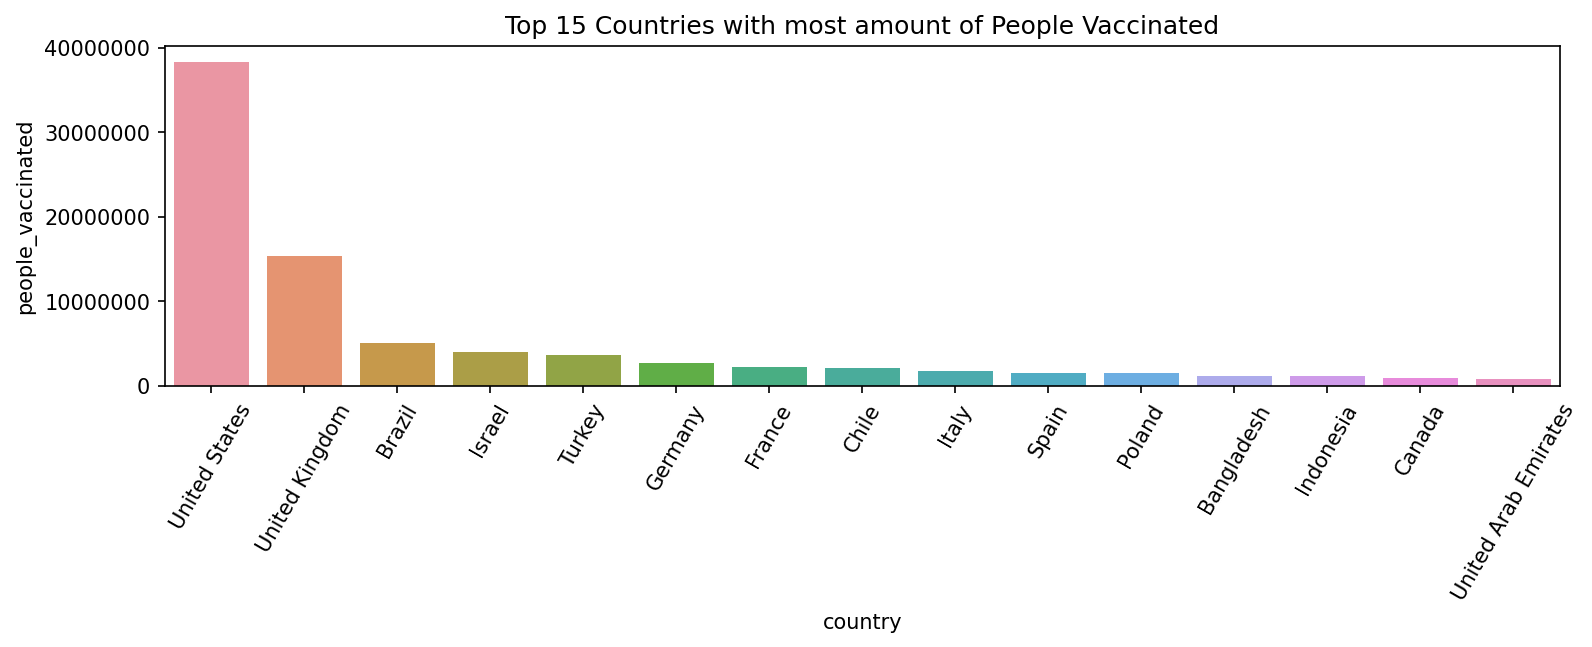

In [19]:
# plotting the total amount of people vaccinated by countries
plt.figure(figsize=(12,3),dpi=150)
plt.title("Top 15 Countries with most amount of People Vaccinated")
plt.xticks(rotation=60) # rotate x labels
plt.ticklabel_format(style='plain',axis='y')

# sort countries by people_vaccinated in descending order
plot_order = max_df.groupby('country')['people_vaccinated'].sum().sort_values(ascending=False).index.values

# plotting barplot of top 15 countries 
sns.barplot(data=max_df, x='country', y='people_vaccinated', order=plot_order[0:15]);

### Total number of people FULLY vaccinated by country

In [20]:
# top 25 countries with most amount of people vaccinated
max_df.groupby('country')['people_fully_vaccinated'].sum().sort_values(ascending=False)[0:25]

country
United States           14077440.0
Israel                   2611036.0
Germany                  1410239.0
Italy                    1288023.0
Spain                    1070091.0
Poland                    645971.0
France                    640875.0
Turkey                    573879.0
United Kingdom            539630.0
Indonesia                 482625.0
Romania                   454169.0
United Arab Emirates      250000.0
Argentina                 237610.0
Brazil                    217869.0
Portugal                  197700.0
Belgium                   190324.0
Canada                    173804.0
Greece                    168696.0
Denmark                   168170.0
Serbia                    167710.0
Austria                   143889.0
Hungary                   129339.0
Sweden                    116206.0
Ireland                    89999.0
Mexico                     86198.0
Name: people_fully_vaccinated, dtype: float64

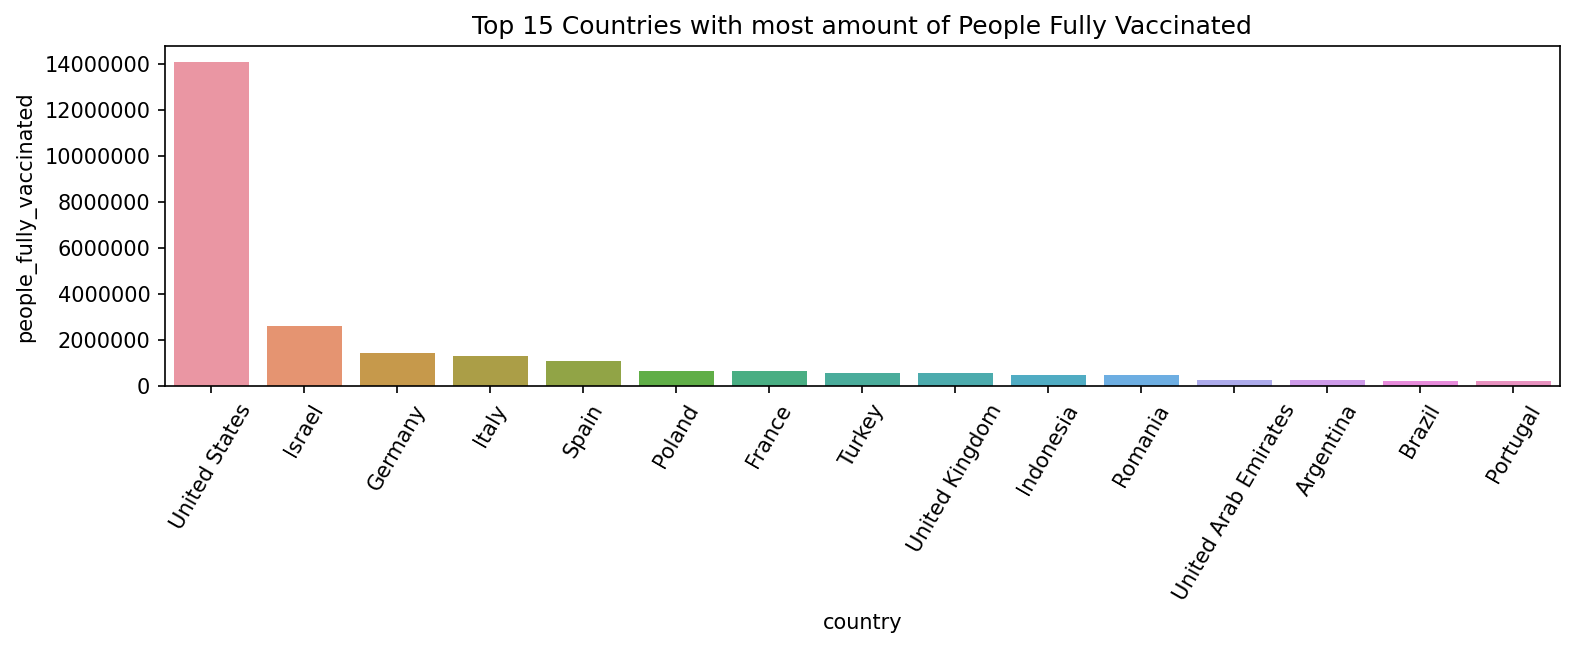

In [21]:
# plotting the total amount of people fully vaccinated by countries
plt.figure(figsize=(12,3),dpi=150)
plt.title("Top 15 Countries with most amount of People Fully Vaccinated")
plt.xticks(rotation=60) # rotate x labels
plt.ticklabel_format(style='plain',axis='y')

# sort countries by people_fully_vaccinated in descending order
plot_order = max_df.groupby('country')['people_fully_vaccinated'].sum().sort_values(ascending=False).index.values

# plotting barplot of top 15 countries 
sns.barplot(data=max_df, x='country', y='people_fully_vaccinated', order=plot_order[0:15]);

### Type of vaccines

**Number of each type of vaccine that are distributed to different countries**

In [22]:
# count number of vaccines given to countries (example: Pfizer/BioNTech is given to 23 countries)
max_df['vaccines'].value_counts()

Pfizer/BioNTech                                                                       20
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          19
Moderna, Pfizer/BioNTech                                                               7
Oxford/AstraZeneca                                                                     6
Oxford/AstraZeneca, Pfizer/BioNTech                                                    5
Sputnik V                                                                              3
Sinopharm/Beijing                                                                      2
Oxford/AstraZeneca, Sinopharm/Beijing                                                  2
Sinovac                                                                                2
Covaxin, Oxford/AstraZeneca                                                            1
Oxford/AstraZeneca, Sinovac                                                            1
Oxford/AstraZeneca, S

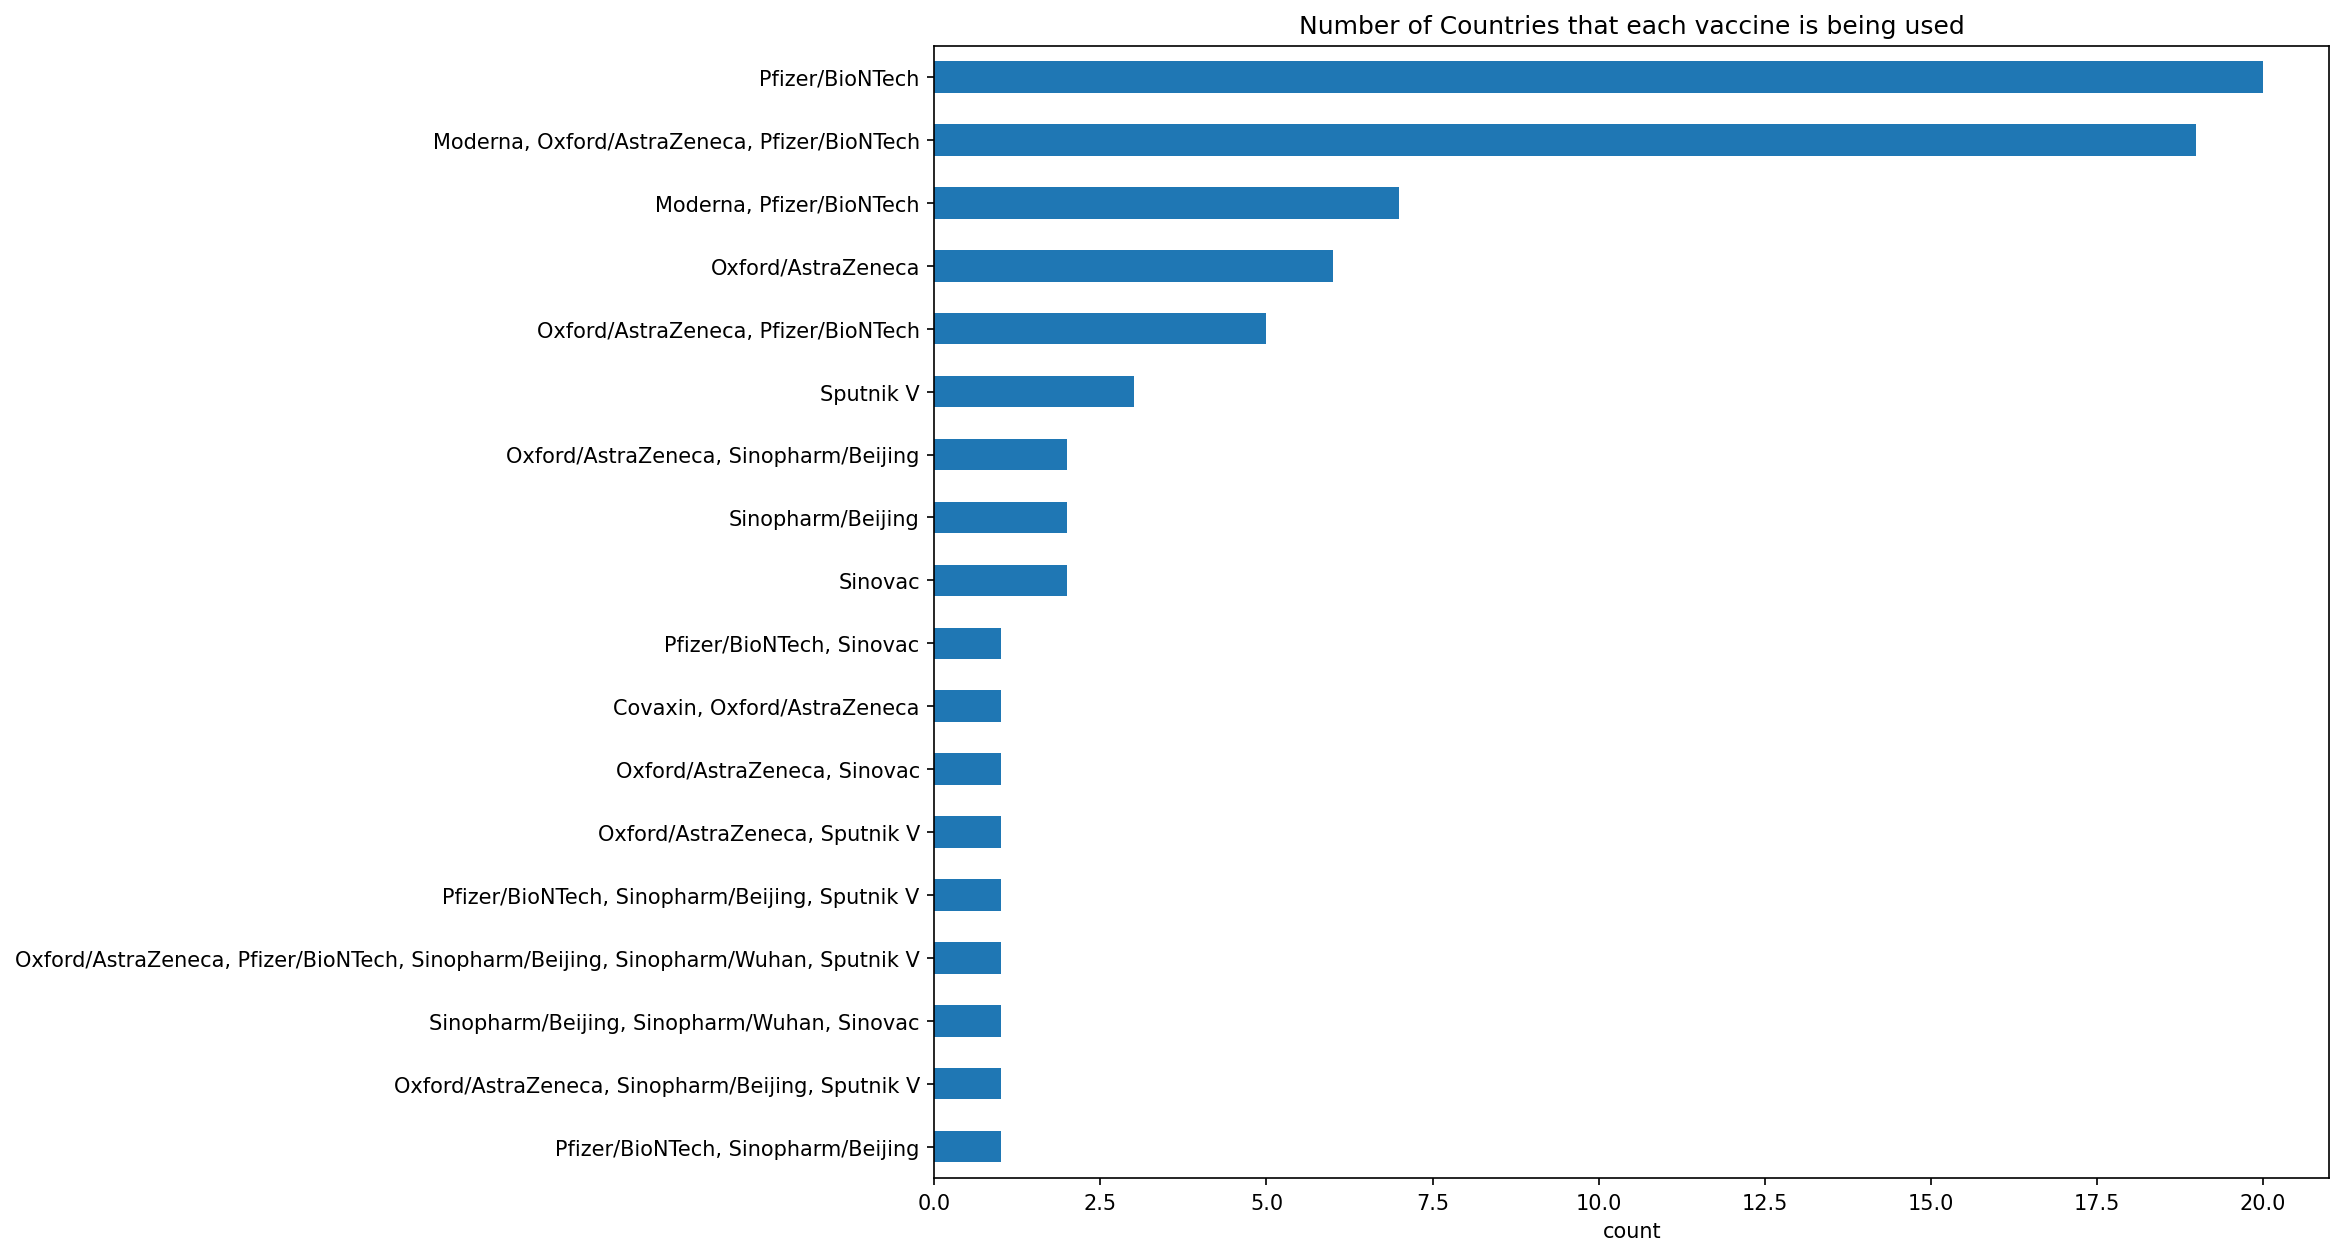

In [23]:
# plotting the count of vaccines given to countries
plt.figure(figsize=(12,10),dpi=150)
plt.title("Number of Countries that each vaccine is being used")
plt.xlabel("count")

# plotting horizontal bar
max_df['vaccines'].value_counts().sort_values().plot(kind='barh');

Pfizer/BioNtech is the most frequently used vaccine

**Proportion of each vaccine given to countries**

In [24]:
# percentage of each vaccines
round(max_df['vaccines'].value_counts()/len(max_df) * 100,1)

Pfizer/BioNTech                                                                       26.7
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          25.3
Moderna, Pfizer/BioNTech                                                               9.3
Oxford/AstraZeneca                                                                     8.0
Oxford/AstraZeneca, Pfizer/BioNTech                                                    6.7
Sputnik V                                                                              4.0
Sinopharm/Beijing                                                                      2.7
Oxford/AstraZeneca, Sinopharm/Beijing                                                  2.7
Sinovac                                                                                2.7
Covaxin, Oxford/AstraZeneca                                                            1.3
Oxford/AstraZeneca, Sinovac                                                            1.3

# Cumulative vaccinations across dates

In [25]:
date_df = df[['date','daily_vaccinations_raw']].sort_values('date',ascending=True)

In [26]:
date_df = date_df.groupby('date')['daily_vaccinations_raw'].sum().reset_index()

In [27]:
date_df

,date,daily_vaccinations_raw
0,2020-12-13,0.0
1,2020-12-14,0.0
2,2020-12-15,0.0
3,2020-12-16,0.0
4,2020-12-17,0.0
...,...,...
60,2021-02-11,4674362.0
61,2021-02-12,5385828.0
62,2021-02-13,4700735.0
63,2021-02-14,3366069.0


**Total cumulative of Daily_vaccinations_raw for all countries**

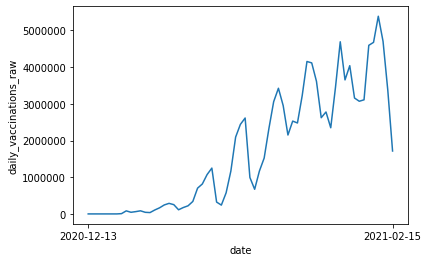

In [28]:
# minimum and maximum dates in dataframe
t = [df['date'].min(),df['date'].max()]

sns.lineplot(data=date_df,x='date',y='daily_vaccinations_raw')
plt.xticks(t,t)
plt.ticklabel_format(style='plain',axis='y');

## Linear Regression

In [538]:
def forecast_total_vaccinations(df,proj_country):
    '''Linear regresion model using total vaccination'''
    
    df = df[df['country']==proj_country]                  #Select only the lines of the country of interest
    df.dropna(subset=['total_vaccinations'],inplace= True)#Remove rows without total_vaccination data
    
    dates = df['date']
    date_format = [pd.to_datetime(d) for d in dates]
    
    dates.index[1]
    first_day=dates[dates.index[0]] # first data reference
    
    # prepare the lists for the model
    X = date_format
    y = df['total_vaccinations'].tolist()[1:]

    # date format is not suitable for modeling, let's transform the date into incrementals number 
    starting_date = 0 # can be used in case we want to disconsider inicial points
    day_numbers = []
    for i in range(1, len(X)):
        day_numbers.append([i])
    X = day_numbers
    
    # # let's train our model only with data after the starting date
    X = X[starting_date:]
    y = y[starting_date:]
    # Instantiate Linear Regression
    linear_regr = linear_model.LinearRegression()
    # Train the model using the training sets
    linear_regr.fit(X, y)
    
    from sklearn.metrics import max_error
    import math
    y_pred = linear_regr.predict(X)
    error = max_error(y, y_pred)
    
    #predicting 70% vaccination
    first_day = datetime.strptime(first_day, "%Y-%m-%d")
    days_until_70 = math.ceil((int(df['2019 [YR2019]'][dates.index[0]])*2*0.7-linear_regr.intercept_)/linear_regr.coef_)
    
    day_70 = first_day + timedelta(days=days_until_70)
    
    X_test = []
    future_days = 100
    
    for i in range(starting_date, starting_date + future_days):
        X_test.append([i])
    y_pred_linear = linear_regr.predict(X_test)
    
    y_pred_max = []
    y_pred_min = []
    for i in range(0, len(y_pred_linear)):
        y_pred_max.append(y_pred_linear[i] + error)
        y_pred_min.append(y_pred_linear[i] - error)
        
    A= df['date'].reset_index(drop=True) # reseting the index
    
    
    # convert date into datetime format
    date_zero = datetime.strptime(str(A[starting_date]), '%Y-%m-%d') #'%Y-%m-%d %H:%M:%S'
    
    # creating x_ticks for making the plot more appealing
    date_prev = []
    x_ticks = []
    step = 5
    data_curr = date_zero
    x_current = starting_date
    n = int(future_days / step)
    for i in range(0, n):
        date_prev.append(str(data_curr.day) + "/" + str(data_curr.month))
        x_ticks.append(x_current)
        data_curr = data_curr + timedelta(days=step)
        x_current = x_current + step
        
    # plot known data
    plt.figure(figsize=(15, 8))
    plt.grid()
    plt.scatter(X, y, label='data points')
    
    # plot linear regression prediction
    plt.plot(X_test, y_pred_linear, color='green', linewidth=2, label='forecast')
    
    # plot maximum error
    plt.plot(X_test, y_pred_max, color='red', linewidth=1, linestyle='dashed', label='confidence interval')
    
    #plot minimum error
    plt.plot(X_test, y_pred_min, color='red', linewidth=1, linestyle='dashed')
   
    plt.xlabel('Days')
    plt.xlim(starting_date, starting_date + future_days)
    plt.xticks(x_ticks, date_prev)
    plt.ylabel('Total Vaccinations')
    plt.title('Trend for total Vaccinations in '+str(proj_country))
    plt.yscale("log")
    #plt.savefig("prediction.png")

    plt.axhline(y=int(df['2019 [YR2019]'][dates.index[0]])*2, color='r', linestyle='-', label='100% vaccination')
    plt.axhline(y=int(df['2019 [YR2019]'][dates.index[0]])*2*0.7, color='b', linestyle='-', label='70% vaccination')

    plt.figtext(0.5, 0.01, "Linear Regression Model Score (R²): {0} using {1} data points\n Predicted date for 70% of vaccinations:{2}-{3}-{4}".format(linear_regr.score(X, y),len(X),day_70.year,day_70.month,day_70.day), horizontalalignment='center')
    
    plt.legend()
    plt.show()

<ipython-input-538-732a1060275a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['total_vaccinations'],inplace= True)#Remove rows without total_vaccination data


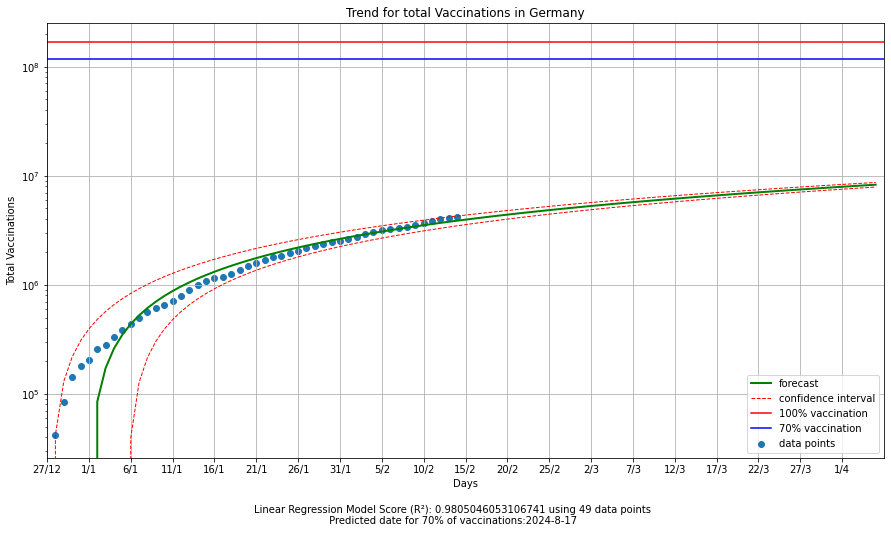

In [669]:
forecast_total_vaccinations(df,'Germany') # just change the country for the graph
    

### Regression Table for all countries

In [667]:
def projection_table(df):
    
    '''
    Here we create a table with relavant data for all countries, namely
    Country/
    Population/
    Vaccines needed/
    Projection of vaccines applied until today/
    Remaining need of vaccines/
    projected day until 70% of people vaccinated/ 
    datapoints used for the projection
    '''
    
    max_df = df.groupby(['country'])[['total_vaccinations','vaccines','2019 [YR2019]']].max().reset_index()
    
    
    date_for_70=[]
    proj_vacs_today =[]
    proj_vacs_remaining =[]
    num_datapoints = []
    
    for ind,current_country in enumerate(max_df['country']):
        
        proj_country = current_country
        df_country = df.copy()
        df_country = df_country[df_country['country']==proj_country]    #Select only the rows of the country of interest
        df_country.dropna(subset=['total_vaccinations'],inplace= True)#Remove rows without total_vaccination data

        dates = df_country['date']
        date_format = [pd.to_datetime(d) for d in dates]
        
        if(dates.empty or len(dates)<3):
            date_for_70.append('Error')
            proj_vacs_today.append('Error')
            proj_vacs_remaining.append('Error')
            num_datapoints.append('<3')
            continue 
        
        dates.index[0]
        first_day=dates[dates.index[0]] # first data reference

        # prepare the lists for the model
        X = date_format
        y = df_country['total_vaccinations'].tolist()[1:]

        # date format is not suitable for modeling, let's transform the date into incrementals number 
        starting_date = 0 # can be used in case we want to disconsider inicial points
        day_numbers = []
        for i in range(1, len(X)):
            day_numbers.append([i])
        X = day_numbers

        # # let's train our model only with data after the starting date
        X = X[starting_date:]
        y = y[starting_date:]
        # Instantiate Linear Regression
        linear_regr = linear_model.LinearRegression()
        # Train the model using the training sets
        linear_regr.fit(X, y)

        y_pred = linear_regr.predict(X)
        error = max_error(y, y_pred)

        #predicting 70% vaccination
        first_day = datetime.strptime(first_day, "%Y-%m-%d")
        days_until_70 = math.ceil((int(df_country['2019 [YR2019]'][dates.index[0]])*2*0.7-linear_regr.intercept_)/linear_regr.coef_)
        day_70 = first_day + timedelta(days=days_until_70)
        
        date_for_70.append(day_70) # save predicted 70% date for each country
        
        #predicting # of applied vaccines for today
        proj_today = (datetime.today()-first_day).days * linear_regr.coef_ + linear_regr.intercept_
        
        proj_vacs_today.append(proj_today) # save predicted vaccines for today
        
        proj_remaining = int(df_country['2019 [YR2019]'][dates.index[0]])*2 - proj_today
        proj_vacs_remaining.append(proj_remaining)
        
        num_datapoints.append(len(dates)) # number of datapoints, so we can have a feeling if we might need more data
        
        
    date_for_70_as_df = pd.DataFrame(date_for_70, columns=['date_for_70'])
    max_df = max_df.merge(date_for_70_as_df, how='left', left_index= True, right_index= True)
    
    proj_vacs_today_as_df = pd.DataFrame(proj_vacs_today, columns=['proj_vacs_today','b','c','d','e']) # dont ask about 'b','c','d','e', IDK
    max_df = max_df.merge(proj_vacs_today_as_df, how='left', left_index= True, right_index= True) 
    
    proj_vacs_remaining_as_df = pd.DataFrame(proj_vacs_remaining, columns=['proj_vacs_remaining','b2','c2','d2','e2']) # dont ask about 'b','c','d','e', IDK
    max_df = max_df.merge(proj_vacs_remaining_as_df, how='left', left_index= True, right_index= True)
    
    num_datapoints_as_df = pd.DataFrame(num_datapoints, columns=['num_datapoints'])
    max_df = max_df.merge(num_datapoints_as_df, how='left', left_index= True, right_index= True) 
    
    max_df['Vacs Needed'] = max_df['2019 [YR2019]'].astype('int32')*2
    
    print(max_df[['country', '2019 [YR2019]','Vacs Needed','proj_vacs_today','proj_vacs_remaining','date_for_70','num_datapoints']])


In [668]:
projection_table(df)

                     country 2019 [YR2019]  Vacs Needed  proj_vacs_today  \
0                    Albania       2854191      5708382      3440.893939   
1                    Algeria      43053054     86106108                E   
2                    Andorra         77142       154284          10981.0   
3                  Argentina      44938712     89877424   1372076.561576   
4                    Austria       8877067     17754134    568722.009714   
..                       ...           ...          ...              ...   
70                    Turkey      83429615    166859230   5531074.417781   
71  Turks and Caicos Islands         38191        76382                E   
72      United Arab Emirates       9770529     19541058   7712708.467666   
73            United Kingdom      66834405    133668810  32510876.112213   
74             United States     328239523    656479046  90365693.263969   

   proj_vacs_remaining          date_for_70 num_datapoints  
0       5704941.106061  21

## 